In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Imports
from common import display_input_data, check_input_data_indices, train_model, prepare_dataset, evaluate_model, \
    run_input_optimizer, calculate_accuracy, calculate_error_rate
import pandas as pd
import ipywidgets as widgets
import numpy as np
import itertools
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [21]:
# Parameters
# Chose variables to create the model
#provare a mettere quelli della blade bevel che magari funzionano  
input_cols = ['shape', 'profile_entrance', 'rising_entrance', 'rising_exit', 'shards', 'feathering', 'entrance_mounding', 'center_mounding', 'exit_mounding']
result_col = 'result'
# Load the train and the validation datasets for blade class prediction
train_dataset_file = '../DATA/Train/serration_prediction_train.xlsx'
test_dataset_file = '../DATA/Validation/serration_prediction_validation.xlsx'

In [22]:
# check that all inputs correspond 
check_input_data_indices(train_dataset_file, test_dataset_file, input_cols)

#preparing the test dataset 
from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=61)

Datasets are compatible


In [23]:
from collections import Counter
from imblearn.over_sampling import SMOTE

#preparing the test dataset 
from sklearn.model_selection import train_test_split
x, y = prepare_dataset(train_dataset_file, input_cols, result_col)
# counter = Counter(y)
# print('Before', counter)
# smt =SMOTE(sampling_strategy='all')
# x_smt, y_smt = smt.fit_resample(x, y)
# counter = Counter(y_smt)
# print('After', counter)
# #con 48 ottengo accuracy del 79
# #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=61)
# print(x)
# print(y)

In [24]:
logReg = LogisticRegression(solver='liblinear', C = 100, penalty = 'l2')
logReg.fit(x, y)


LogisticRegression(C=100, solver='liblinear')

In [25]:
# scores = cross_val_score(logReg, x, y, cv=10, scoring= 'accuracy')
# #printing the score for each of the cv 
# scores
# 
# #here we have the mean score and the standard deviation
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [26]:
from sklearn.metrics import make_scorer, precision_score, f1_score, recall_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_validate
# Define custom scoring metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'AUC_scorer': make_scorer(roc_auc_score),
    'accuracy': make_scorer(accuracy_score)
}

scores = cross_validate(logReg, x, y, cv=10, scoring= scoring, return_train_score= True)
#printing the score for each of the cv 
scores

#here we have the mean score and the standard deviation
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
#here is printing the score using the cross-validation


{'fit_time': array([0.00343847, 0.00342345, 0.00220966, 0.00170875, 0.00223732,
        0.00225925, 0.00225234, 0.00223398, 0.00111461, 0.00223851]),
 'score_time': array([0.00690818, 0.00600052, 0.00562835, 0.0055604 , 0.00452065,
        0.00576758, 0.00534868, 0.00559258, 0.00559473, 0.00445008]),
 'test_precision': array([0.75      , 0.6       , 0.66666667, 1.        , 1.        ,
        1.        , 1.        , 0.66666667, 1.        , 0.625     ]),
 'train_precision': array([0.83018868, 0.87378641, 0.88235294, 0.84158416, 0.8627451 ,
        0.84761905, 0.86792453, 0.8490566 , 0.84158416, 0.87962963]),
 'test_recall': array([1.        , 1.        , 0.83333333, 1.        , 0.66666667,
        0.91666667, 0.58333333, 0.66666667, 0.75      , 0.41666667]),
 'train_recall': array([0.81481481, 0.83333333, 0.83333333, 0.78703704, 0.81481481,
        0.82407407, 0.85185185, 0.83333333, 0.78703704, 0.87962963]),
 'test_f1_score': array([0.85714286, 0.75      , 0.74074074, 1.        , 0.8  

In [27]:
x_test, y_test = prepare_dataset(test_dataset_file, input_cols, result_col)
y_pred = logReg.predict(x_test)
# print(y_test)
#assuming y_true contains the true labels and y_pred contains the predicted labels
#Calculate precision

# # changing threshold and predicting 
# print('prediction with threshold 0.9 :') 
# y_pred_new_threshold = (logReg.predict_proba(x_test)[:, 1] >= 0.4).astype(int) 
# print(y_pred_new_threshold)

target_names = ['non-serrated', 'serrated']
# Evaluation metrics for default threshold 
print("Evaluation metrics with threshold 0.5:") 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Precision:", precision_score(y_test, y_pred)) 
print("Recall:", recall_score(y_test, y_pred)) 
print("F1 score:", f1_score(y_test, y_pred))

class_report = classification_report(y_test, y_pred, target_names= target_names)
print(class_report)

class_report = classification_report(y_test, y_pred)
print(class_report)

# # Evaluation metrics for new threshold 
# print("Evaluation metrics with threshold 0.7:") 
# print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold)) 
# print("Precision:", precision_score(y_test, y_pred_new_threshold)) 
# print("Recall:", recall_score(y_test, y_pred_new_threshold)) 
# print("F1 score:", f1_score(y_test, y_pred_new_threshold))
# class_report = classification_report(y_test, y_pred_new_threshold)
# print(class_report)

Evaluation metrics with threshold 0.5:
Accuracy: 0.7164179104477612
Precision: 0.6052631578947368
Recall: 0.8518518518518519
F1 score: 0.7076923076923076
              precision    recall  f1-score   support

non-serrated       0.86      0.62      0.72        40
    serrated       0.61      0.85      0.71        27

    accuracy                           0.72        67
   macro avg       0.73      0.74      0.72        67
weighted avg       0.76      0.72      0.72        67

              precision    recall  f1-score   support

       False       0.86      0.62      0.72        40
        True       0.61      0.85      0.71        27

    accuracy                           0.72        67
   macro avg       0.73      0.74      0.72        67
weighted avg       0.76      0.72      0.72        67


Area Under the ROC Curve for threshold 0.5: 0.7953703703703704


NameError: name 'y_pred_new_threshold' is not defined

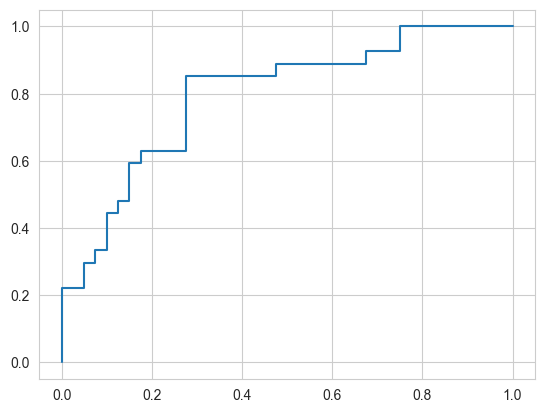

In [28]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# ROC Curve 
y_scores = logReg.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_scores) 
plt.plot(fpr, tpr,  label = 'Threshold = 0.5') 
print('Area Under the ROC Curve for threshold 0.5:', roc_auc_score(y_test, y_scores)) 

# For Threshold 0.9 
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_new_threshold) 
print('Area Under the ROC Curve for threshold 0.9:', roc_auc_score(y_test, y_pred_new_threshold)) 
plt.plot(fpr_, tpr_, label = 'Threshold = 0.9') 

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend() 
plt.show()





from sklearn.metrics import confusion_matrix



# plot confusion matrix
cm_dot_five = confusion_matrix(y_test, y_pred)
cm_dot_five

In [ ]:
# use gridsearch to find the best hyperparameters using cross-validation 
# set the dictionaries for the best parameter combination 
param_grid = {

    'solver': ['liblinear'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator = LogisticRegression(), refit='accuracy',  param_grid= param_grid, scoring=['accuracy'], cv=10,)


grid_result = grid_search.fit(x, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# filter data for the new dataframe
df = pd.read_excel(test_dataset_file)
label = df["label"]

In [ ]:
#build dataframe with result, expected result and label 

data = {'label': label, 'result': y_pred, "expected_result" : y_test}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
   
#print(df)  

grouped_df = df.groupby(by = "label")

In [ ]:
five = grouped_df.get_group(5)
six = grouped_df.get_group(6)
seven = grouped_df.get_group(7)

serrated = pd.concat([five, six, seven], ignore_index= True)

print(f'serrated\n{serrated}\n')
serrated_accuracy = calculate_accuracy(serrated)

print( "For serrated class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", serrated_accuracy, "\n")

In [ ]:
for name, sub_df in grouped_df:
    print(f'{name}\n{sub_df}\n')

# calculate accuracy for non_serrated class
one = grouped_df.get_group(1)
two = grouped_df.get_group(2)
three = grouped_df.get_group(3)
four = grouped_df.get_group(4)

non_serrated = pd.concat([one, two, three, four], ignore_index= True)
print(f'non-serrated\n{non_serrated}\n')
non_serrated_accuracy = calculate_accuracy(non_serrated)

print( "For non-serrated class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", non_serrated_accuracy, "\n")

In [ ]:
# calculate accuracy for non_serrated class without knife number 4
one = grouped_df.get_group(1)
two = grouped_df.get_group(2)
three = grouped_df.get_group(3)


non_serrated = pd.concat([one, two, three], ignore_index= True)
print(f'non-serrated\n{non_serrated}\n')
non_serrated_accuracy = calculate_accuracy(non_serrated)

print( "For non-serrated class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", non_serrated_accuracy, "\n")

In [ ]:
#calculate classification accuracy for each knife 
for name, sub_df in grouped_df:
    accuracy_perc = calculate_accuracy(sub_df)
  
    print( "knife:", name) 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
    
    print( "accuracy %:", accuracy_perc, "\n")
       